#**PROJETO: Simulação do Álbum de Figurinhas da Copa**

---



##Integrantes do Grupo:

---



In [1]:
import numpy as np
import statistics

In [17]:
n_album = 670
preco_pacote = 4
cromos_por_pacote = 5
preco_album = 44.90
simulacoes = 1000

In [18]:
FIGURINHAS = {x for x in range(n_album)}
FIGURINHAS_LIST = list(FIGURINHAS)
def abre_pacote():
    return np.random.choice(FIGURINHAS_LIST, 5)

In [19]:
def completa_album():
    figurinhas_obtidas = set()
    pacotes_abertos = 0
    while figurinhas_obtidas != FIGURINHAS:
        novo_pacote = abre_pacote()
        pacotes_abertos += 1
        figurinhas_obtidas.update(novo_pacote)
    return pacotes_abertos

In [22]:
def completa_album_2():
    figurinhas_obtidas = set()
    pacotes_abertos = 0
    while figurinhas_obtidas != FIGURINHAS:
        novo_pacote = abre_pacote()
        novo_pacote2 = abre_pacote()
        pacote = [*novo_pacote, *novo_pacote2]
        pacotes_abertos += 2
        figurinhas_obtidas.update(pacote)
    return pacotes_abertos

In [43]:
# distribuição empírica

def distr_emp(pontos = 5):

    # faz a distribuição empírica para 5 pontos
    y_ax = [0]
    figurinhas_obtidas = set()
    pacotes_abertos = 0
    x_ax = [int(670/pontos*x) for x in range(pontos+1)]
    x_ax_aux = x_ax.copy()
    x_ax_aux.pop(0)
    
    while figurinhas_obtidas != FIGURINHAS:
        novo_pacote = abre_pacote()
        figurinhas_obtidas.update(novo_pacote)
        if x_ax_aux[0] <= len(figurinhas_obtidas):
            y_ax.append(pacotes_abertos*preco_pacote)
            x_ax_aux.pop(0)
        pacotes_abertos += 1
        
    print(x_ax,y_ax)

In [44]:
distr_emp()

[0, 134, 268, 402, 536, 670] [0, 120, 280, 496, 836, 4680]


In [50]:
def distr_2():
    
    # faz a distribuição empírica para todos os pontos encontrados
    figurinhas_obtidas = set()
    pacotes_abertos = 0
    # eixo do valor gasto até o momento
    y_ax = [0]
    # eixo da quantidade de figurinhas únicas obtidas
    x_ax = [0]
        
    while figurinhas_obtidas != FIGURINHAS:
        novo_pacote = abre_pacote()
        s = set(novo_pacote)
        # verifica se o novo pacote tem alguma figurinha nova
        if (s - figurinhas_obtidas) != set():
            y_ax.append(pacotes_abertos*preco_pacote)
            x_ax.append(len(figurinhas_obtidas))
            figurinhas_obtidas.update(novo_pacote)
        pacotes_abertos += 1

    return x_ax, y_ax

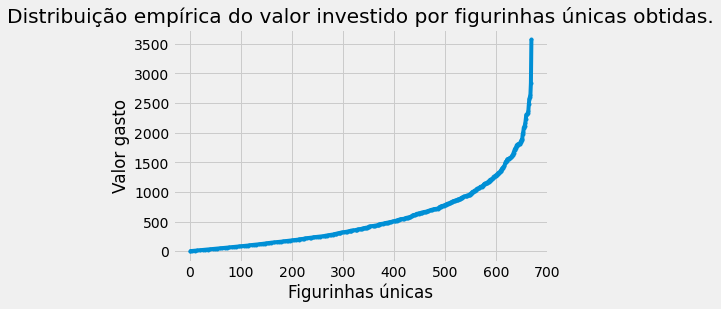

In [70]:
from matplotlib import pyplot as plt
x_ax, y_ax = distr_2()
# plt.style.use('fivethirtyeight')
plt.plot(x_ax,y_ax, marker=".")
plt.title("Distribuição empírica do valor investido por figurinhas únicas obtidas.")
plt.xlabel("Figurinhas únicas")
plt.ylabel("Valor gasto")
plt.show()

In [72]:

if __name__ == "__main__":
  sim = []
  sim2 = []
  for i in range(simulacoes):
    # para fazer as simulações com uma pessoa comprando 1 pacote por vez
    # sim.append(completa_album())
    # para fazer as simulações com duas pessoas comprando 2 pacotes simultaneamente 
    sim.append(completa_album_2())
    print(i)
  media_pacotes = statistics.mean(sim)
  preco_pacotes = media_pacotes*preco_pacote
  print(f"Para completar um album de {n_album} figurinhas que custa {preco_album}, é necessário comprar em média {media_pacotes} pacotes, com um gasto de {preco_pacotes} somente em pacotes de figurinhas, com um valor total de {preco_pacotes+preco_album}.")
  # calcular a distribuição empírica utilizando pontos de referência (figurinhas faltantes, valor gasto)
  print(statistics.mean(sim))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27